In [1]:
from scipy.stats import norm, gamma
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

$\mathbb{P}\left(M_t \leq m\right)$

In [2]:
m = np.linspace(0,100, 10_000)

mu = 1
sigma = 5
t = 10

Pm = norm.cdf( (m - mu*t)/(sigma*np.sqrt(t))) - np.exp( (2*m*mu)/sigma**2 )*norm.cdf(- (m+mu*t)/(sigma*np.sqrt(t)))

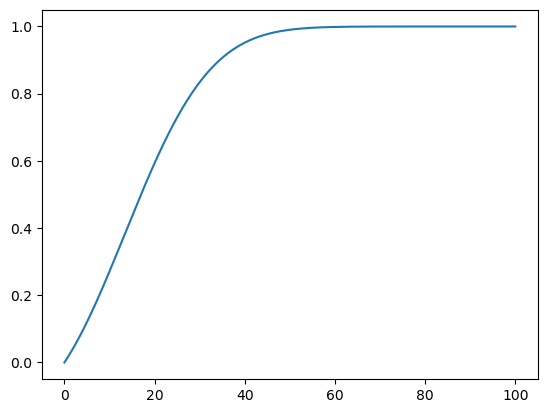

In [3]:
plt.plot(m,Pm)

$f_{T_l}(t)$

In [4]:
l=10
mu=0.1
sigma=0.5
tspan = [0, 4*l/mu]

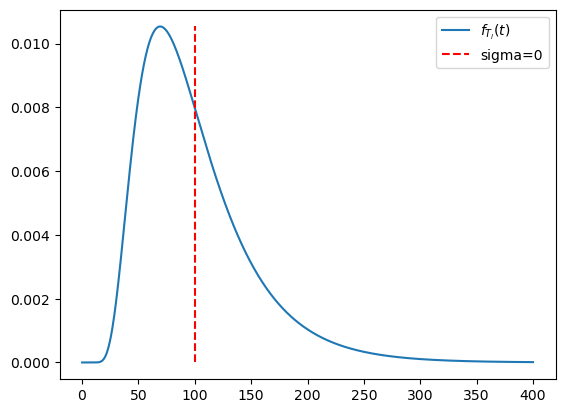

In [5]:
t = np.linspace(0.1,tspan[1],1_000)

ft_first = norm.pdf( (l-mu*t) / (sigma * np.sqrt(t)))*((mu*t+l)/(2*sigma*np.sqrt(t)*t))
ft = norm.pdf( (l-mu*t) / (sigma * np.sqrt(t)))*((mu*t+l)/(2*sigma*np.sqrt(t)*t)) + np.exp(2*l*mu/sigma**2) * norm.pdf(- (l+mu*t)/(sigma*np.sqrt(t)))*((l-mu*t)/(2*sigma*np.power(t,3/2)))

fig, ax = plt.subplots(1,1)
ax.plot(t,ft, label="$f_{T_l}(t)$")
# ax.plot(t,ft_first, "r", label="$f_{T_l}$[1]")
ax.vlines(l/mu, min(ft[ft==ft]), max(ft[ft==ft]), colors="r", linestyles="dashed", label="sigma=0")
ax.legend();

Monte-Carlo verification of $f_{T_l}$

100%|██████████| 55/55 [03:27<00:00,  3.77s/it]

99.96149826742203% simulation success
99.93949727737748% simulation success
99.94499752488862% simulation success
99.9284967823552% simulation success
99.94499752488862% simulation success
99.94499752488862% simulation success
99.94499752488862% simulation success
99.95049777239976% simulation success
99.96149826742203% simulation success
99.93949727737748% simulation success
99.9284967823552% simulation success
99.93399702986633% simulation success
99.96699851493317% simulation success
99.92299653484406% simulation success
99.95049777239976% simulation success
99.93399702986633% simulation success
99.92299653484406% simulation success
99.93949727737748% simulation success
99.94499752488862% simulation success
99.95049777239976% simulation success
99.93949727737748% simulation success
99.93949727737748% simulation success
99.96149826742203% simulation success
99.9724987624443% simulation success
99.94499752488862% simulation success
99.9559980199109% simulation success
99.9449975248886

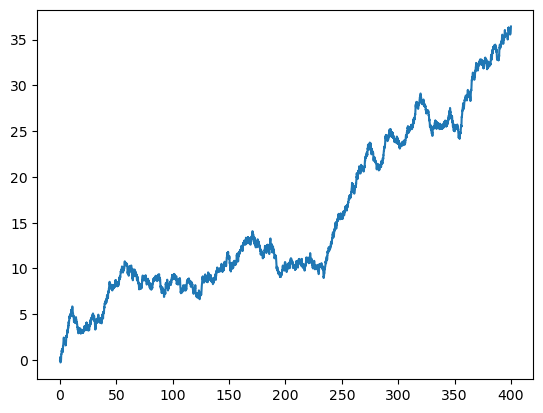

In [6]:
n = 1_000_000       # Number of simulations
nt = 5_000      # fineness of simulation

n_batch = 55

tt = np.linspace(tspan[0], tspan[1], num = nt + 1)
dt = (tspan[1] - tspan[0]) / nt

T_res = []
sim_success_array = []

for i in tqdm(range(n_batch)):
    t = np.concatenate( (np.zeros((n//n_batch,1)), norm.rvs(size = (n//n_batch,nt))), axis=1) * np.sqrt(dt)
    t = sigma*np.cumsum(t, axis=1) + mu*tt

    T = np.argmax(t >= l, axis=1)

    i_succes_sim = np.max(t, axis=1) > l
    T = T[i_succes_sim]*dt

    T_res = np.concatenate((T_res, T))

    # print(f"{i_succes_sim.mean()*100}% sim succeeded")

    sim_success_array += [i_succes_sim.mean()*100]

for p in sim_success_array:
    print(f"{p}% simulation success")

plt.plot(tt,t[0,:])

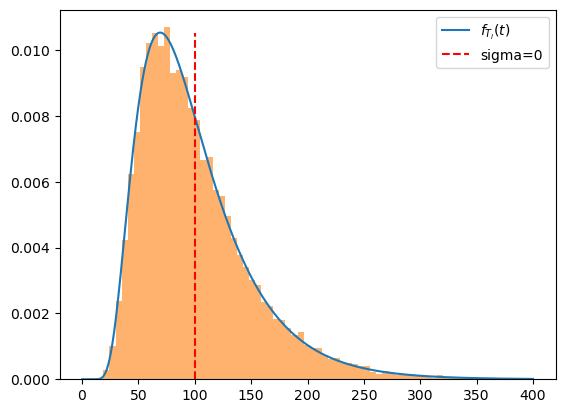

In [7]:
h = ax.hist(T, bins=70, density=True, alpha=0.6)
fig

Gamma approximation (fit to simulation)

In [8]:
# mean
mean = T.mean()
mean_th = l/mu

# variance
var = T.var()
var_th = l*sigma**2 / mu**3

print(f"theoretical mean: {mean_th}")
print(f"simmulation mean: {mean}")

print(f"theoretical var: {var_th}")
print(f"simmulation var: {var}")

print(f"simulation time fineness: {dt}")

theoretical mean: 100.0
simmulation mean: 100.70377723970944
theoretical var: 2499.9999999999995
simmulation var: 2505.715359802458
simulation time fineness: 0.08


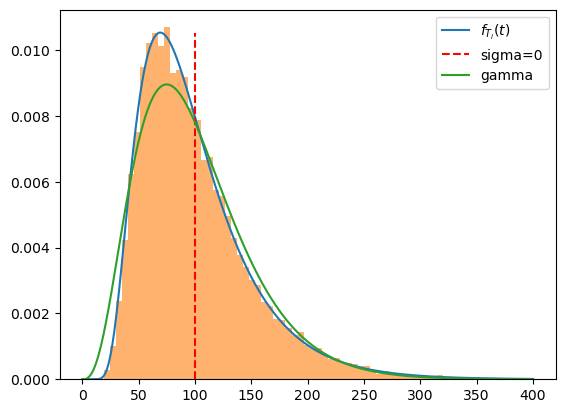

In [9]:
# Match parameters 
theta = var_th/mean_th
k = mean_th/theta

tt = np.linspace(0,tspan[1], 1_000)
ft_gamma = gamma.pdf(tt, k, scale=theta)

# Plot
ax.plot(tt,ft_gamma, label="gamma")
ax.legend()
fig